In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags

In [15]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import generate_simulation_data as simulate

# parameter

In [2]:
num_season = 10
num_match = 10
num_team = 20

# simulation by MC
## 1. simulation parameters

In [3]:
var_latent = 1
coef_latent = 1
sig_latent = 1

In [4]:
pc_latent = diags([-coef_latent/var_latent, 1/var_latent, -coef_latent/var_latent],
                  offsets = [-1, 0, 1],
                  shape=(num_season, num_season)).todense()
pc_latent[np.arange(num_season-1), np.arange(num_season-1)] += (coef_latent**2)/var_latent
var_latent = np.linalg.inv(pc_latent)
inv_sqrt_var = np.diag(1/np.sqrt(np.diag(var_latent)))
var_latent = sig_latent * inv_sqrt_var @ var_latent @ inv_sqrt_var

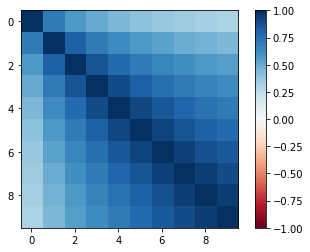

In [5]:
plt.imshow(var_latent, 
           cmap='RdBu', vmin=-sig_latent, vmax=sig_latent)
plt.colorbar()

## 2. latent parameters

In [6]:
latent = np.transpose(
    np.random.multivariate_normal(
        [0]*num_season, var_latent, num_team))

Text(0, 0.5, 'season number')

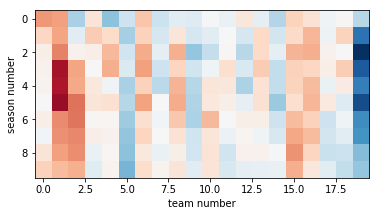

In [7]:
plt.imshow(latent, cmap='RdBu',
           vmin=-np.max(np.abs(latent)), 
           vmax=np.max(np.abs(latent)))
plt.xlabel("team number")
plt.ylabel("season number")

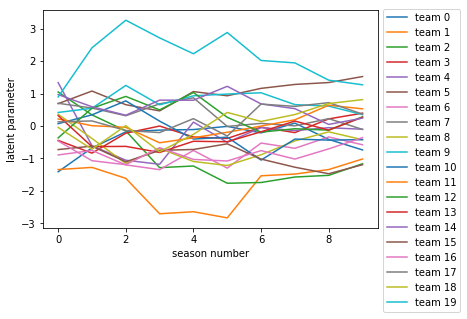

In [8]:
for i in range(num_team):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

## 3. pairwise comparison data

In [9]:
data = np.zeros([num_season, num_team, num_team])
for i in range(num_season):
    for j in range(num_team):
        for k in range(i+1, num_team):
            p_jk  = np.exp(latent[i,j])/(np.exp(latent[i,j])+np.exp(latent[i,k]))
            data[i,j,k] = np.random.binomial(num_match, p_jk)
            data[i,k,j] = num_match - data[i,j,k]

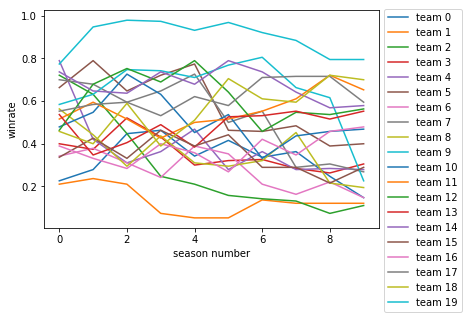

In [10]:
winrate = np.sum(data, 2)/((num_team-1)*num_match)
for i in range(num_team):
    plt.plot(winrate[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("winrate")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

In [14]:
np.save('simulation_MC_data.npy', data)
np.save('simulation_MC_latent.npy', latent)